## Setup the simple metric computation

Move current directory to project root

In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

if 'project_root' not in dir():
    project_root = Path.cwd().parent
    
os.chdir(project_root)

In [9]:
import pandas as pd
df = pd.read_csv("ood/evaluation/cifar10_export.csv")
# negate the entire "relative-dimensionality" column
df["relative-dimensionality"] = -df["relative-dimensionality"]

df

,_defaultColorIndex,id,likelihood,name,relative-dimensionality
0,4,uqbaath5,11051.347656,svhn_vs_cifar10_train_exstill,9.191733e-10
1,4,uqbaath5,6845.464844,svhn_vs_cifar10_train_exstill,-6.836457e+00
2,4,uqbaath5,7258.182617,svhn_vs_cifar10_train_exstill,1.218034e-09
3,4,uqbaath5,7346.343750,svhn_vs_cifar10_train_exstill,5.230533e-10
4,4,uqbaath5,7213.621582,svhn_vs_cifar10_train_exstill,2.123361e-10
...,...,...,...,...,...
91,0,2biwdtya,11294.400391,cifar10_vs_svhn_train_comparcioner,-4.008166e+00
92,0,2biwdtya,12454.639648,cifar10_vs_svhn_train_comparcioner,-1.999999e+01
93,0,2biwdtya,12569.690430,cifar10_vs_svhn_train_comparcioner,-7.993503e+00
94,0,2biwdtya,11302.004883,cifar10_vs_svhn_train_comparcioner,5.653660e-10


In [33]:
%autoreload 2
from ood.evaluation.utils import parse_table, get_roc_curves, get_auc

all_task_tables = parse_table(df)

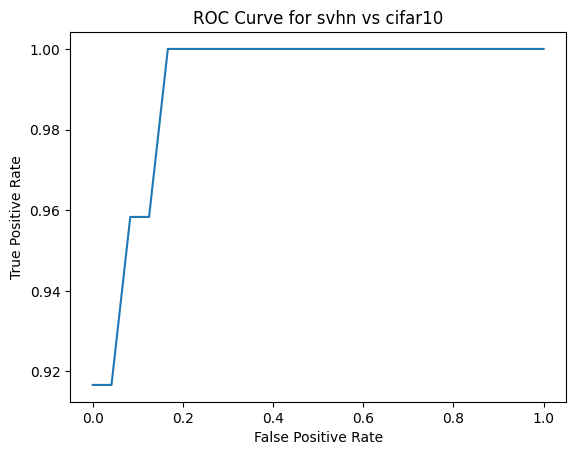

AUC: 0.9913194444444445


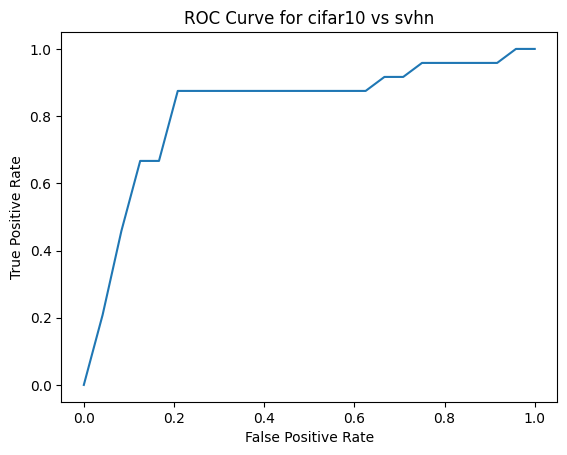

AUC: 0.8229166666666669


In [34]:
for first_part in all_task_tables.keys():
    for second_part in all_task_tables[first_part].keys():
        df = all_task_tables[first_part][second_part]
        fp, tp = get_roc_curves(df, "relative-dimensionality", "likelihood")['train-vs-ood']
        
        plt.plot(fp, tp)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve for {} vs {}".format(first_part, second_part))
        plt.show()
        print("AUC: {}".format(get_auc(fp, tp)))

In [29]:
svhn_vs_cifar10 = all_task_tables['svhn']['cifar10']

In [30]:
res = get_auc_curves(svhn_vs_cifar10, "relative-dimensionality", "likelihood")

In [31]:
fp, tp = res['train-vs-ood']

Text(0, 0.5, 'True Positive Rate')

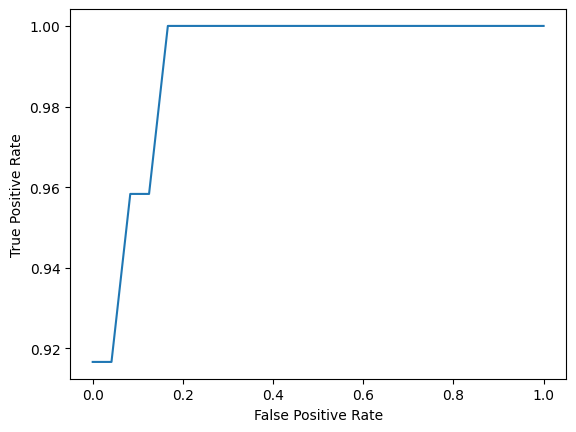

In [32]:
from matplotlib import pyplot as plt
